In [19]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score,roc_curve,auc
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB

# Load Dataset

In [20]:
training_set = pd.read_csv("../dataset/cleanedLabeledTrainData.csv")

Y=training_set['sentiment'].values
X=training_set['review'].values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)
print ("No. of Training Examples: ",x_train.shape)
print ("No. of Testing Examples: ",x_test.shape)

No. of Training Examples:  (20000,)
No. of Testing Examples:  (5000,)


In [21]:
tf=TfidfVectorizer(min_df=10,max_df=0.95,use_idf=True)

tf.fit_transform(x_train)
X_train=tf.transform(x_train) # for train data we can use fit_transfrom also.
X_test=tf.transform(x_test)
pickle.dump(tf, open('vectorizer.sav', 'wb'))

In [22]:
# Evaluating models peformance based on precision, recall and accuracy
def do_evaluation (pairs, pos_label=0, verbose=True):
    predicted, actual = zip(*pairs)
    precision = precision_score(actual,predicted,pos_label=pos_label)
    recall = recall_score(actual,predicted,pos_label=pos_label)
    accuracy = accuracy_score(actual,predicted)
    f1score = f1_score(actual,predicted)

    if verbose:
        print('"Positive' if pos_label==1 else '"Negative','Evaluation"','| Precision ==',round(precision*100,2),'| Recall ==',round(recall*100,2),'| Accuracy ==',round(accuracy*100,2),'| F1 score ==',round(f1score*100,2))

# Training phase....

In [23]:
# Training phase
gnb=GaussianNB()
gnb.fit(X_train.toarray(),y_train)
pickle.dump(gnb, open('gnb.sav', 'wb'))
# Testing phase
gnb_pred=gnb.predict(X_test.toarray())
print("Gaussain Accuracy: ",round(accuracy_score(y_test,gnb_pred),3))
print ('{:.1%} of prediction are positive'.format(float(sum(gnb_pred))/len(y_test)))
print ('{:.1%} are actually positive'.format(float(sum(y_test))/len(y_test)))
do_evaluation (zip(gnb_pred,y_test), pos_label= 1, verbose=True)
do_evaluation (zip(gnb_pred,y_test), pos_label= 0, verbose=True)

Gaussain Accuracy:  0.756
47.0% of prediction are positive
50.0% are actually positive
"Positive Evaluation" | Precision == 77.28 | Recall == 72.64 | Accuracy == 75.64 | F1 score == 74.89
"Negative Evaluation" | Precision == 74.19 | Recall == 78.64 | Accuracy == 75.64 | F1 score == 74.89


In [24]:
# Training phase
cnb=ComplementNB()
cnb.fit(X_train,y_train)
pickle.dump(cnb, open('cnb.sav', 'wb'))
# Testing phase
cnb_pred=cnb.predict(X_test)
print("Complement Accuracy: ",round(accuracy_score(y_test,cnb_pred),3))
print ('{:.1%} of prediction are positive'.format(float(sum(cnb_pred))/len(y_test)))
print ('{:.1%} are actually positive'.format(float(sum(y_test))/len(y_test)))
do_evaluation (zip(cnb_pred,y_test), pos_label= 1, verbose=True)
do_evaluation (zip(cnb_pred,y_test), pos_label= 0, verbose=True)

Complement Accuracy:  0.864
50.0% of prediction are positive
50.0% are actually positive
"Positive Evaluation" | Precision == 86.4 | Recall == 86.4 | Accuracy == 86.4 | F1 score == 86.4
"Negative Evaluation" | Precision == 86.4 | Recall == 86.4 | Accuracy == 86.4 | F1 score == 86.4


In [25]:
# Training phase
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
pickle.dump(mnb, open('mnb.sav', 'wb'))
# Testing phase
mnb_pred=mnb.predict(X_test)
print("Multinomial Accuracy: ",round(accuracy_score(y_test,mnb_pred),3))
print ('{:.1%} of prediction are positive'.format(float(sum(mnb_pred))/len(y_test)))
print ('{:.1%} are actually positive'.format(float(sum(y_test))/len(y_test)))
do_evaluation (zip(mnb_pred,y_test), pos_label= 1, verbose=True)
do_evaluation (zip(mnb_pred,y_test), pos_label= 0, verbose=True)

Multinomial Accuracy:  0.864
50.0% of prediction are positive
50.0% are actually positive
"Positive Evaluation" | Precision == 86.4 | Recall == 86.4 | Accuracy == 86.4 | F1 score == 86.4
"Negative Evaluation" | Precision == 86.4 | Recall == 86.4 | Accuracy == 86.4 | F1 score == 86.4


In [26]:
# Training phase
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
pickle.dump(bnb, open('bnb.sav', 'wb'))
# Testing phase
bnb_pred=bnb.predict(X_test)
print("Bernoulli Accuracy: ",round(accuracy_score(y_test,bnb_pred),3))
print ('{:.1%} of prediction are positive'.format(float(sum(bnb_pred))/len(y_test)))
print ('{:.1%} are actually positive'.format(float(sum(y_test))/len(y_test)))
do_evaluation (zip(bnb_pred,y_test), pos_label= 1, verbose=True)
do_evaluation (zip(bnb_pred,y_test), pos_label= 0, verbose=True)

Bernoulli Accuracy:  0.843
47.3% of prediction are positive
50.0% are actually positive
"Positive Evaluation" | Precision == 86.22 | Recall == 81.6 | Accuracy == 84.28 | F1 score == 83.85
"Negative Evaluation" | Precision == 82.54 | Recall == 86.96 | Accuracy == 84.28 | F1 score == 83.85


# E valuate classifier performance(roc and auc curve)

In [27]:
def display_curve(nb_pred,name):
    #Calculating False Positive Rate ,True Positive Rate and threshold
    fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_pred)
    #AUC is the percentage of the ROC plot that is underneath the curve:
    roc_auc_nb = auc(fpr_nb, tpr_nb)
    plt.title(f'Operating Characteristic for {name} Naive Bayes Classifier')
    plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC = %0.2f' % roc_auc_nb)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

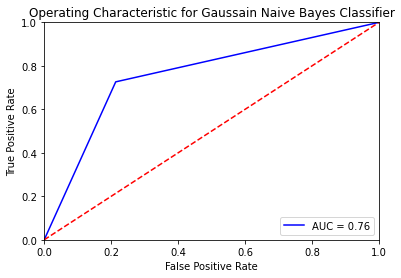

In [28]:
# Gaussian Naive Bayes Classifier
display_curve(gnb_pred,'Gaussain')

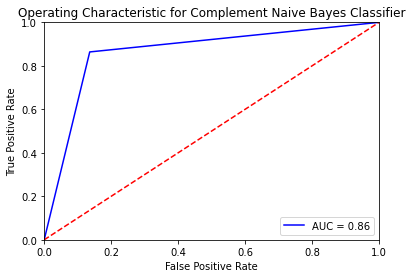

In [29]:
# Complement Naive Bayes Classifier
display_curve(cnb_pred,'Complement')

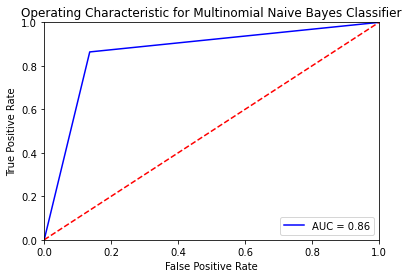

In [30]:
# Multinomial Naive Bayes Classifier
display_curve(mnb_pred,'Multinomial')

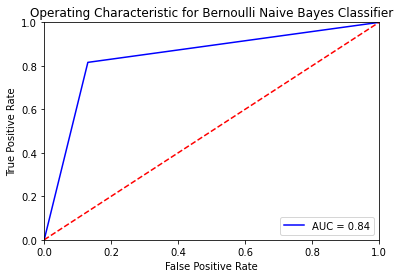

In [31]:
# Bernoulli Naive Bayes Classifier
display_curve(bnb_pred,'Bernoulli')

# Testing

In [32]:
# Load model
gnb = pickle.load(open('gnb.sav','rb'))
mnb = pickle.load(open('mnb.sav','rb'))
cnb = pickle.load(open('cnb.sav','rb'))
bnb = pickle.load(open('bnb.sav','rb'))
tf = pickle.load(open('vectorizer.sav','rb'))

# Testing
test_array = ['love','good','fine','bad','worst']
test_func = lambda x: 'pos' if x==1 else 'neg'
classes_gnb = gnb.predict(tf.transform(test_array).toarray())
classes_mnb = mnb.predict(tf.transform(test_array))
classes_cnb = cnb.predict(tf.transform(test_array))
classes_bnb = bnb.predict(tf.transform(test_array))
for sentence,g,m,c,b in zip(test_array,classes_gnb,classes_mnb,classes_cnb,classes_bnb):
    print(sentence,': Gaussain=',test_func(g),'| Multinomail=',test_func(m),'| Complement=',test_func(c),'| Bernoulli=',test_func(b))


love : Gaussain= pos | Multinomail= pos | Complement= pos | Bernoulli= neg
good : Gaussain= neg | Multinomail= pos | Complement= pos | Bernoulli= neg
fine : Gaussain= pos | Multinomail= pos | Complement= pos | Bernoulli= neg
bad : Gaussain= neg | Multinomail= neg | Complement= neg | Bernoulli= neg
worst : Gaussain= neg | Multinomail= neg | Complement= neg | Bernoulli= neg


In [33]:
text = input('Enter a sentence: ')
test_array = [text]
test_func = lambda x: 'pos' if x==1 else 'neg'
classes_gnb = gnb.predict(tf.transform(test_array).toarray())
classes_mnb = mnb.predict(tf.transform(test_array))
classes_cnb = cnb.predict(tf.transform(test_array))
classes_bnb = bnb.predict(tf.transform(test_array))
for sentence,g,m,c,b in zip(test_array,classes_gnb,classes_mnb,classes_cnb,classes_bnb):
    print(sentence,': Gaussain=',test_func(g),'| Multinomail=',test_func(m),'| Complement=',test_func(c),'| Bernoulli=',test_func(b))

hello  : Gaussain= neg | Multinomail= neg | Complement= neg | Bernoulli= neg
